# Mini Variational Quantum Eigensolver

Hi, I am Uday Singla. This is my solution for [QIndia's Techni-Q Project 1](https://github.com/qIndia/Techni-Q/blob/main/Project%201.md).

In [1]:
%matplotlib inline
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

### Prepare Hamiltonian

$ H = Z \otimes Z$

In [2]:
def hamiltonian():
    Z = np.array([
        [1, 0],
        [0, -1]
    ])

    H = np.kron(Z, Z)
    return H

### Prepare Ansatz

In [3]:
def ansatz(qc, params):
    if len(params) < 12:
        raise Error("Number of parameters should be 12")
        
    qc.u(params[0], params[1], params[2], 0)
    qc.u(params[3], params[4], params[5], 1)
    qc.cx(0, 1)
    qc.u(params[6], params[7], params[8], 0)
    qc.u(params[9], params[10], params[11], 1)
    qc.cx(1, 0)
    return qc

### Initialize parameters for the ansatz

In [4]:
pi = np.pi
params = [
    np.random.random() * 2 * pi for num in range(12)
]

### Draw the quantum circuit

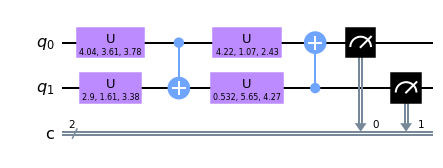

In [5]:
qc = QuantumCircuit(2, 2)
qc = ansatz(qc, params)
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')

### Get the backend

In [6]:
backend = Aer.get_backend("statevector_simulator")
H = hamiltonian()

### Calculate expectation value for the arbitrarily constructed trial state 

In [7]:
N = 1000
expectation = 0
for _ in range(N):
    job = execute(qc, backend)
    psi = job.result().get_statevector().reshape((4, 1))
    value = np.dot(psi.transpose().conjugate(), np.dot(H, psi)).item(0)
    expectation = expectation + value / N

In [8]:
print("The expectation value of our Hamiltonian with respect to an arbitrarily constructed trial state is: ", expectation)

The expectation value of our Hamiltonian with respect to an arbitrarily constructed trial state is:  (0.3420000000000003+0j)
